<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №3

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студент III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

# Практикум №3: Класифікація на основі багатошарового персептрона (MLP)

## Мета роботи:
- Реалізувати класифікацію за допомогою MLPClassifier
- Почати з моделі з одним скритим шаром
- Динамічно додавати нейрони до скритого шару
- Визначити оптимальну кількість нейронів
- При необхідності реалізувати багатошарову модель

## Крок 1: Імпорт бібліотек та завантаження даних

In [35]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, roc_curve, auc, precision_recall_curve,
                             roc_auc_score)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Налаштування для візуалізації
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

### Завантаження датасетів
Використовуємо ті ж самі дані, що й у Практикумі №2:
- **XOR dataset** - синтетичні дані для перевірки можливості розділення нелінійних класів
- **Iris dataset** - реальні дані про квіти ірисів

In [36]:
# Датасет (а) - XOR dataset
np.random.seed(42)
X_xor = np.random.randn(300, 2)
Y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

# Датасет (б) - Iris dataset
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("Датасети завантажені:")
print(f"  XOR: {X_xor.shape[0]} зразків, {X_xor.shape[1]} ознак, {len(np.unique(Y_xor))} класів")
print(f"  Iris: {X_iris.shape[0]} зразків, {X_iris.shape[1]} ознак, {len(np.unique(Y_iris))} класів")

Датасети завантажені:
  XOR: 300 зразків, 2 ознак, 2 класів
  Iris: 150 зразків, 4 ознак, 3 класів


### Розбиття на навчальний та валідаційний набори

In [37]:
# Розбиття XOR dataset (70% - навчання, 30% - валідація)
X_xor_train, X_xor_val, Y_xor_train, Y_xor_val = train_test_split(
    X_xor, Y_xor, test_size=0.3, random_state=42, stratify=Y_xor
)

# Розбиття Iris dataset
X_iris_train, X_iris_val, Y_iris_train, Y_iris_val = train_test_split(
    X_iris, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

print("Дані розбито на навчальні та валідаційні набори:")
print(f"\nXOR Dataset:")
print(f"  Навчальний: {X_xor_train.shape[0]} зразків")
print(f"  Валідаційний: {X_xor_val.shape[0]} зразків")

print(f"\nIris Dataset:")
print(f"  Навчальний: {X_iris_train.shape[0]} зразків")
print(f"  Валідаційний: {X_iris_val.shape[0]} зразків")

Дані розбито на навчальні та валідаційні набори:

XOR Dataset:
  Навчальний: 210 зразків
  Валідаційний: 90 зразків

Iris Dataset:
  Навчальний: 105 зразків
  Валідаційний: 45 зразків


## Крок 2: MLP з одним скритим шаром - додавання нейронів

Тестуємо різну кількість нейронів у одному скритому шарі: 2, 5, 10, 20, 50, 100

In [38]:
# Список кількостей нейронів для тестування
neuron_counts = [2, 5, 10, 20, 50, 100, 250, 1000]

# Словники для збереження результатів
results_xor = {'neurons': [], 'train_acc': [], 'val_acc': [], 'models': []}
results_iris = {'neurons': [], 'train_acc': [], 'val_acc': [], 'models': []}

print("="*70)
print("ТЕСТУВАННЯ MLP З ОДНИМ СКРИТИМ ШАРОМ")
print("="*70)

# Тестування на XOR dataset
print("\n--- XOR DATASET ---\n")
for n_neurons in neuron_counts:
    # Створюємо модель з одним скритим шаром
    # hidden_layer_sizes=(n_neurons,) - один шар з n_neurons нейронів
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',  # функція активації
        solver='adam',      # алгоритм оптимізації
        max_iter=2000,      # максимальна кількість ітерацій
        random_state=42
    )
    
    # Навчаємо модель
    model.fit(X_xor_train, Y_xor_train)
    
    # Обчислюємо точність
    train_acc = accuracy_score(Y_xor_train, model.predict(X_xor_train))
    val_acc = accuracy_score(Y_xor_val, model.predict(X_xor_val))
    
    # Зберігаємо результати
    results_xor['neurons'].append(n_neurons)
    results_xor['train_acc'].append(train_acc)
    results_xor['val_acc'].append(val_acc)
    results_xor['models'].append(model)
    
    print(f"Кількість нейронів: {n_neurons:3d}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

# Тестування на Iris dataset
print("\n--- IRIS DATASET ---\n")
for n_neurons in neuron_counts:
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_iris_train, Y_iris_train)
    
    train_acc = accuracy_score(Y_iris_train, model.predict(X_iris_train))
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val))
    
    results_iris['neurons'].append(n_neurons)
    results_iris['train_acc'].append(train_acc)
    results_iris['val_acc'].append(val_acc)
    results_iris['models'].append(model)
    
    print(f"Кількість нейронів: {n_neurons:3d}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

print("\n" + "="*70)

ТЕСТУВАННЯ MLP З ОДНИМ СКРИТИМ ШАРОМ

--- XOR DATASET ---

Кількість нейронів:   2  |  Точність (навч.): 0.6905  |  Точність (валід.): 0.7333
Кількість нейронів:   5  |  Точність (навч.): 0.9381  |  Точність (валід.): 0.8889
Кількість нейронів:  10  |  Точність (навч.): 0.9762  |  Точність (валід.): 0.9444
Кількість нейронів:  20  |  Точність (навч.): 0.9762  |  Точність (валід.): 0.9778
Кількість нейронів:  50  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кількість нейронів: 100  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кількість нейронів: 250  |  Точність (навч.): 0.9667  |  Точність (валід.): 0.9778
Кількість нейронів: 1000  |  Точність (навч.): 0.9571  |  Точність (валід.): 0.9889

--- IRIS DATASET ---

Кількість нейронів:   2  |  Точність (навч.): 0.9619  |  Точність (валід.): 0.9778
Кількість нейронів:   5  |  Точність (навч.): 0.9714  |  Точність (валід.): 1.0000
Кількість нейронів:  10  |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Кіль

### Візуалізація залежності точності від кількості нейронів

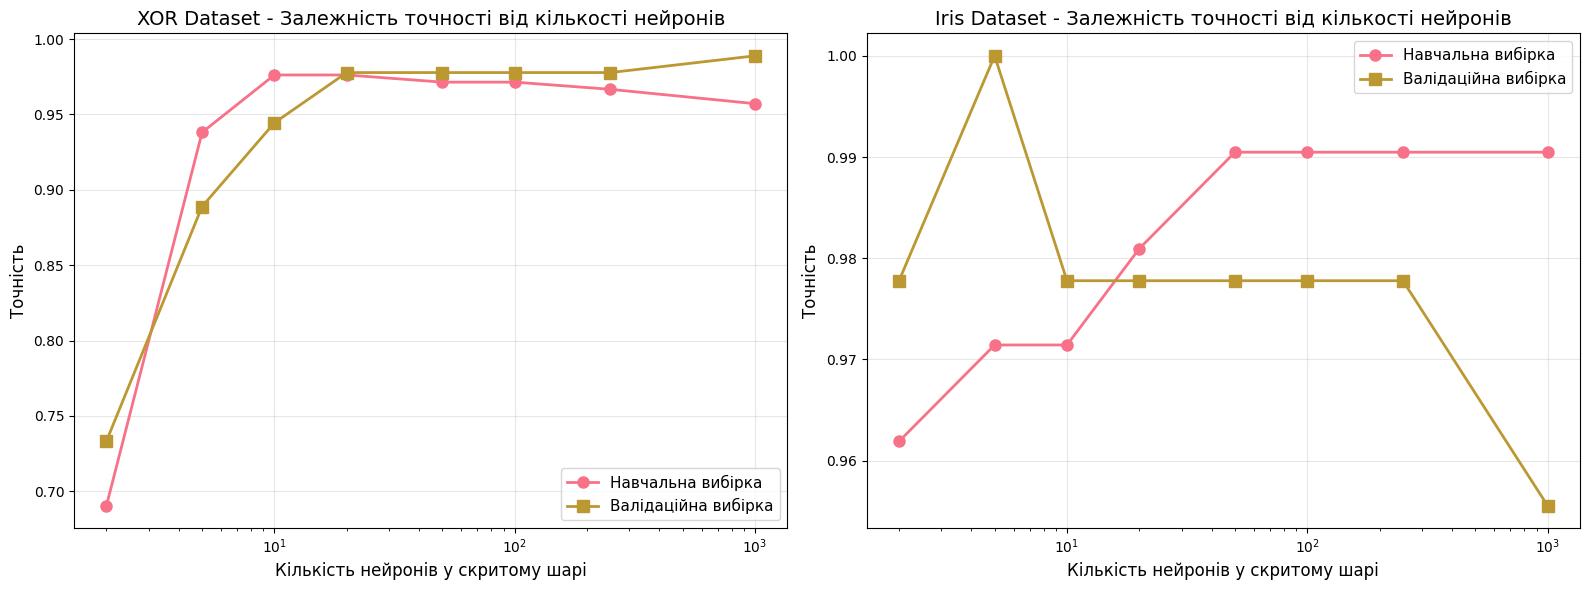

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# XOR Dataset
axes[0].plot(results_xor['neurons'], results_xor['train_acc'], 
             'o-', label='Навчальна вибірка', linewidth=2, markersize=8)
axes[0].plot(results_xor['neurons'], results_xor['val_acc'], 
             's-', label='Валідаційна вибірка', linewidth=2, markersize=8)
axes[0].set_xlabel('Кількість нейронів у скритому шарі', fontsize=12)
axes[0].set_ylabel('Точність', fontsize=12)
axes[0].set_title('XOR Dataset - Залежність точності від кількості нейронів', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Iris Dataset
axes[1].plot(results_iris['neurons'], results_iris['train_acc'], 
             'o-', label='Навчальна вибірка', linewidth=2, markersize=8)
axes[1].plot(results_iris['neurons'], results_iris['val_acc'], 
             's-', label='Валідаційна вибірка', linewidth=2, markersize=8)
axes[1].set_xlabel('Кількість нейронів у скритому шарі', fontsize=12)
axes[1].set_ylabel('Точність', fontsize=12)
axes[1].set_title('Iris Dataset - Залежність точності від кількості нейронів', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

### Визначення оптимальної кількості нейронів

In [40]:
# Знаходимо оптимальну кількість нейронів (максимальна точність на валідації)
best_idx_xor = np.argmax(results_xor['val_acc'])
best_neurons_xor = results_xor['neurons'][best_idx_xor]
best_val_acc_xor = results_xor['val_acc'][best_idx_xor]

best_idx_iris = np.argmax(results_iris['val_acc'])
best_neurons_iris = results_iris['neurons'][best_idx_iris]
best_val_acc_iris = results_iris['val_acc'][best_idx_iris]

print("="*70)
print("ОПТИМАЛЬНА КОНФІГУРАЦІЯ ДЛЯ ОДНОШАРОВОЇ МОДЕЛІ")
print("="*70)
print(f"\nXOR Dataset:")
print(f"  Оптимальна кількість нейронів: {best_neurons_xor}")
print(f"  Точність на валідації: {best_val_acc_xor:.4f}")
print(f"  Точність на навчанні: {results_xor['train_acc'][best_idx_xor]:.4f}")
print(f"  Різниця (overfitting): {results_xor['train_acc'][best_idx_xor] - best_val_acc_xor:.4f}")

print(f"\nIris Dataset:")
print(f"  Оптимальна кількість нейронів: {best_neurons_iris}")
print(f"  Точність на валідації: {best_val_acc_iris:.4f}")
print(f"  Точність на навчанні: {results_iris['train_acc'][best_idx_iris]:.4f}")
print(f"  Різниця (overfitting): {results_iris['train_acc'][best_idx_iris] - best_val_acc_iris:.4f}")
print("\n" + "="*70)

ОПТИМАЛЬНА КОНФІГУРАЦІЯ ДЛЯ ОДНОШАРОВОЇ МОДЕЛІ

XOR Dataset:
  Оптимальна кількість нейронів: 1000
  Точність на валідації: 0.9889
  Точність на навчанні: 0.9571
  Різниця (overfitting): -0.0317

Iris Dataset:
  Оптимальна кількість нейронів: 5
  Точність на валідації: 1.0000
  Точність на навчанні: 0.9714
  Різниця (overfitting): -0.0286



## Крок 3: Багатошарова MLP

Тепер додамо кілька скритих шарів та порівняємо результати

In [41]:
# Конфігурації багатошарових моделей
multilayer_configs = [
    (10, 10),        # 2 шари по 10 нейронів
    (20, 10),        # 2 шари: 20 та 10 нейронів
    (50, 25),        # 2 шари: 50 та 25 нейронів
    (20, 20, 10),    # 3 шари
    (50, 25, 10),    # 3 шари
    (100, 50, 25),   # 3 шари великі
]

# Словники для результатів
multi_results_xor = {'config': [], 'train_acc': [], 'val_acc': [], 'models': []}
multi_results_iris = {'config': [], 'train_acc': [], 'val_acc': [], 'models': []}

print("="*70)
print("ТЕСТУВАННЯ БАГАТОШАРОВИХ MLP")
print("="*70)

# XOR Dataset
print("\n--- XOR DATASET ---\n")
for config in multilayer_configs:
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_xor_train, Y_xor_train)
    
    train_acc = accuracy_score(Y_xor_train, model.predict(X_xor_train))
    val_acc = accuracy_score(Y_xor_val, model.predict(X_xor_val))
    
    multi_results_xor['config'].append(config)
    multi_results_xor['train_acc'].append(train_acc)
    multi_results_xor['val_acc'].append(val_acc)
    multi_results_xor['models'].append(model)
    
    config_str = '-'.join(map(str, config))
    print(f"Конфігурація: {config_str:15s}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

# Iris Dataset
print("\n--- IRIS DATASET ---\n")
for config in multilayer_configs:
    model = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    
    model.fit(X_iris_train, Y_iris_train)
    
    train_acc = accuracy_score(Y_iris_train, model.predict(X_iris_train))
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val))
    
    multi_results_iris['config'].append(config)
    multi_results_iris['train_acc'].append(train_acc)
    multi_results_iris['val_acc'].append(val_acc)
    multi_results_iris['models'].append(model)
    
    config_str = '-'.join(map(str, config))
    print(f"Конфігурація: {config_str:15s}  |  "
          f"Точність (навч.): {train_acc:.4f}  |  "
          f"Точність (валід.): {val_acc:.4f}")

print("\n" + "="*70)

ТЕСТУВАННЯ БАГАТОШАРОВИХ MLP

--- XOR DATASET ---

Конфігурація: 10-10            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9444
Конфігурація: 20-10            |  Точність (навч.): 0.9857  |  Точність (валід.): 0.9667
Конфігурація: 50-25            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9667
Конфігурація: 20-20-10         |  Точність (навч.): 0.9810  |  Точність (валід.): 0.9778
Конфігурація: 50-25-10         |  Точність (навч.): 0.9667  |  Точність (валід.): 0.9667
Конфігурація: 100-50-25        |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778

--- IRIS DATASET ---

Конфігурація: 10-10            |  Точність (навч.): 0.9714  |  Точність (валід.): 0.9778
Конфігурація: 20-10            |  Точність (навч.): 0.9905  |  Точність (валід.): 0.9778
Конфігурація: 50-25            |  Точність (навч.): 1.0000  |  Точність (валід.): 0.9556
Конфігурація: 20-20-10         |  Точність (навч.): 0.9810  |  Точність (валід.): 0.9778
Конфігурація: 50-25-10         |  То

### Порівняння одношарової та багатошарової моделей

In [42]:
# Найкраща багатошарова модель
best_multi_idx_xor = np.argmax(multi_results_xor['val_acc'])
best_multi_config_xor = multi_results_xor['config'][best_multi_idx_xor]
best_multi_val_xor = multi_results_xor['val_acc'][best_multi_idx_xor]

best_multi_idx_iris = np.argmax(multi_results_iris['val_acc'])
best_multi_config_iris = multi_results_iris['config'][best_multi_idx_iris]
best_multi_val_iris = multi_results_iris['val_acc'][best_multi_idx_iris]

print("="*70)
print("ПОРІВНЯННЯ ОДНОШАРОВОЇ ТА БАГАТОШАРОВОЇ МОДЕЛЕЙ")
print("="*70)

print("\n--- XOR DATASET ---")
print(f"\nОдношарова модель:")
print(f"  Конфігурація: ({best_neurons_xor},)")
print(f"  Точність на валідації: {best_val_acc_xor:.4f}")

print(f"\nБагатошарова модель:")
print(f"  Конфігурація: {best_multi_config_xor}")
print(f"  Точність на валідації: {best_multi_val_xor:.4f}")

improvement_xor = best_multi_val_xor - best_val_acc_xor
print(f"\n  Покращення: {improvement_xor:+.4f}")
if improvement_xor > 0.01:
    print("    Багатошарова модель краща!")
elif improvement_xor < -0.01:
    print("    Одношарова модель достатня!")
else:
    print("  = Моделі показують схожі результати")

print("\n--- IRIS DATASET ---")
print(f"\nОдношарова модель:")
print(f"  Конфігурація: ({best_neurons_iris},)")
print(f"  Точність на валідації: {best_val_acc_iris:.4f}")

print(f"\nБагатошарова модель:")
print(f"  Конфігурація: {best_multi_config_iris}")
print(f"  Точність на валідації: {best_multi_val_iris:.4f}")

improvement_iris = best_multi_val_iris - best_val_acc_iris
print(f"\n  Покращення: {improvement_iris:+.4f}")
if improvement_iris > 0.01:
    print("    Багатошарова модель краща!")
elif improvement_iris < -0.01:
    print("    Одношарова модель достатня!")
else:
    print("  = Моделі показують схожі результати")

print("\n" + "="*70)

ПОРІВНЯННЯ ОДНОШАРОВОЇ ТА БАГАТОШАРОВОЇ МОДЕЛЕЙ

--- XOR DATASET ---

Одношарова модель:
  Конфігурація: (1000,)
  Точність на валідації: 0.9889

Багатошарова модель:
  Конфігурація: (20, 20, 10)
  Точність на валідації: 0.9778

  Покращення: -0.0111
    Одношарова модель достатня!

--- IRIS DATASET ---

Одношарова модель:
  Конфігурація: (5,)
  Точність на валідації: 1.0000

Багатошарова модель:
  Конфігурація: (10, 10)
  Точність на валідації: 0.9778

  Покращення: -0.0222
    Одношарова модель достатня!



## Крок 4: Детальний аналіз найкращих моделей

In [43]:
# Беремо найкращі моделі
best_model_xor = results_xor['models'][best_idx_xor] if best_val_acc_xor >= best_multi_val_xor else multi_results_xor['models'][best_multi_idx_xor]
best_model_iris = results_iris['models'][best_idx_iris] if best_val_acc_iris >= best_multi_val_iris else multi_results_iris['models'][best_multi_idx_iris]

# XOR Dataset - Матриця помилок
print("="*70)
print("ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩИХ МОДЕЛЕЙ")
print("="*70)

print("\n--- XOR DATASET ---")
Y_xor_pred = best_model_xor.predict(X_xor_val)
print("\nМатриця помилок:")
cm_xor = confusion_matrix(Y_xor_val, Y_xor_pred)
print(cm_xor)

print("\nЗвіт класифікації:")
print(classification_report(Y_xor_val, Y_xor_pred, target_names=['Class 0', 'Class 1']))

# Iris Dataset
print("\n--- IRIS DATASET ---")
Y_iris_pred = best_model_iris.predict(X_iris_val)
print("\nМатриця помилок:")
cm_iris = confusion_matrix(Y_iris_val, Y_iris_pred)
print(cm_iris)

print("\nЗвіт класифікації:")
print(classification_report(Y_iris_val, Y_iris_pred, target_names=target_names))

ДЕТАЛЬНИЙ АНАЛІЗ НАЙКРАЩИХ МОДЕЛЕЙ

--- XOR DATASET ---

Матриця помилок:
[[43  1]
 [ 0 46]]

Звіт класифікації:
              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        44
     Class 1       0.98      1.00      0.99        46

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90


--- IRIS DATASET ---

Матриця помилок:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]

Звіт класифікації:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Візуалізація матриць помилок

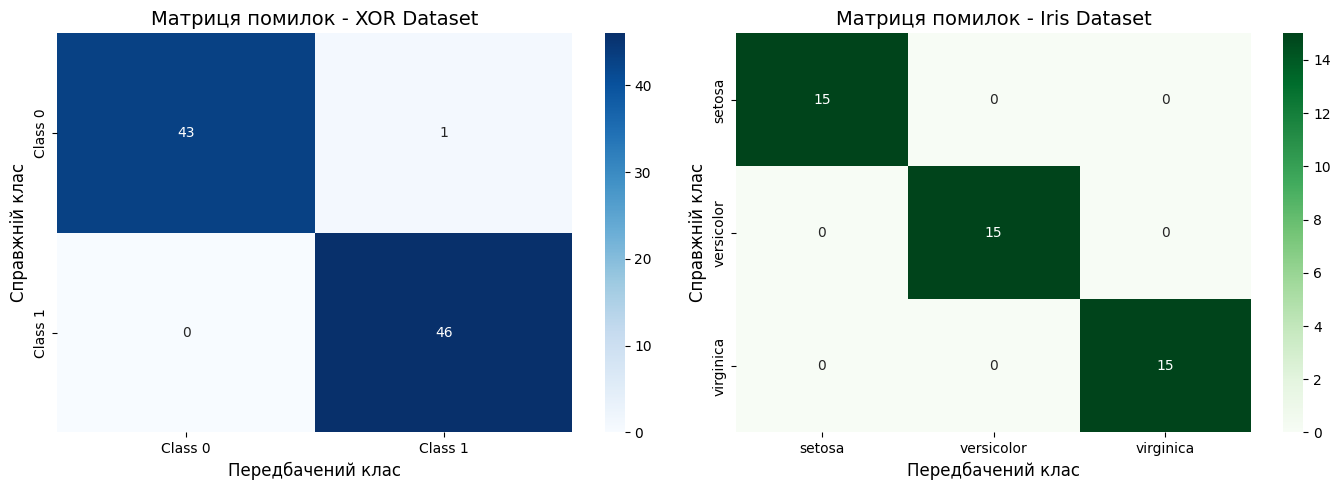

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# XOR Dataset
sns.heatmap(cm_xor, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[0].set_title('Матриця помилок - XOR Dataset', fontsize=14)
axes[0].set_ylabel('Справжній клас', fontsize=12)
axes[0].set_xlabel('Передбачений клас', fontsize=12)

# Iris Dataset
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=target_names,
            yticklabels=target_names)
axes[1].set_title('Матриця помилок - Iris Dataset', fontsize=14)
axes[1].set_ylabel('Справжній клас', fontsize=12)
axes[1].set_xlabel('Передбачений клас', fontsize=12)

plt.tight_layout()
plt.show()

## Крок 5: Виконання прогнозів на основі побудованих моделей

In [45]:
print("="*70)
print("ПРОГНОЗИ НА ОСНОВІ ПОБУДОВАНИХ МОДЕЛЕЙ")
print("="*70)

print("\n--- XOR DATASET ---")
# Прогнози для кращої одношарової моделі
best_xor_model = results_xor['models'][best_idx_xor]
xor_pred_train = best_xor_model.predict(X_xor_train)
xor_pred_val = best_xor_model.predict(X_xor_val)

print(f"\nМодель з {best_neurons_xor} нейронів (одношарова):")
print(f"  Приклади прогнозів на валідаційній вибірці:")
print(f"  {'№':<5} {'X1':<10} {'X2':<10} {'Істина':<10} {'Прогноз':<10}")
print("-" * 60)
for i in range(15):
    print(f"  {i:<5} {X_xor_val[i][0]:<10.3f} {X_xor_val[i][1]:<10.3f} "
          f"{Y_xor_val[i]:<10} {xor_pred_val[i]:<10}")

print(f"\n  Загальна точність на валідації: {accuracy_score(Y_xor_val, xor_pred_val):.4f}")
print(f"  Правильних прогнозів: {np.sum(Y_xor_val == xor_pred_val)}/{len(Y_xor_val)}")
# Прогнози для кращої багатошарової моделі
best_multi_xor_model = multi_results_xor['models'][best_multi_idx_xor]
xor_multi_pred_val = best_multi_xor_model.predict(X_xor_val)

print(f"\nМодель {best_multi_config_xor} (багатошарова):")
print(f"  Загальна точність на валідації: {accuracy_score(Y_xor_val, xor_multi_pred_val):.4f}")
print(f"  Правильних прогнозів: {np.sum(Y_xor_val == xor_multi_pred_val)}/{len(Y_xor_val)}")

print("\n--- IRIS DATASET ---")
# Прогнози для кращої одношарової моделі
best_iris_model = results_iris['models'][best_idx_iris]
iris_pred_train = best_iris_model.predict(X_iris_train)
iris_pred_val = best_iris_model.predict(X_iris_val)

print(f"\nМодель з {best_neurons_iris} нейронів (одношарова):")
print(f"  Приклади прогнозів на валідаційній вибірці:")
print(f"  {'№':<5} {'Істина':<15} {'Прогноз':<15}")
print("-" * 50)
for i in range(15):
    true_class = target_names[Y_iris_val[i]]
    pred_class = target_names[iris_pred_val[i]]
    print(f"  {i:<5} {true_class:<15} {pred_class:<15}")

print(f"\n  Загальна точність на валідації: {accuracy_score(Y_iris_val, iris_pred_val):.4f}")
print(f"  Правильних прогнозів: {np.sum(Y_iris_val == iris_pred_val)}/{len(Y_iris_val)}")
# Прогнози для кращої багатошарової моделі
best_multi_iris_model = multi_results_iris['models'][best_multi_idx_iris]
iris_multi_pred_val = best_multi_iris_model.predict(X_iris_val)

print(f"\nМодель {best_multi_config_iris} (багатошарова):")
print(f"  Загальна точність на валідації: {accuracy_score(Y_iris_val, iris_multi_pred_val):.4f}")
print(f"  Правильних прогнозів: {np.sum(Y_iris_val == iris_multi_pred_val)}/{len(Y_iris_val)}")

# Порівняння прогнозів
print("\n" + "="*70)
print("ПОРІВНЯННЯ ПРОГНОЗІВ")
print("="*70)

comparison_data = {
    'Датасет': ['XOR', 'XOR', 'Iris', 'Iris'],
    'Тип моделі': ['Одношарова', 'Багатошарова', 'Одношарова', 'Багатошарова'],
    'Конфігурація': [f'{best_neurons_xor} нейронів', str(best_multi_config_xor),
                     f'{best_neurons_iris} нейронів', str(best_multi_config_iris)],
    'Точність (train)': [
        accuracy_score(Y_xor_train, xor_pred_train),
        accuracy_score(Y_xor_train, best_multi_xor_model.predict(X_xor_train)),
        accuracy_score(Y_iris_train, iris_pred_train),
        accuracy_score(Y_iris_train, best_multi_iris_model.predict(X_iris_train))
    ],
    'Точність (val)': [
        accuracy_score(Y_xor_val, xor_pred_val),
        accuracy_score(Y_xor_val, xor_multi_pred_val),
        accuracy_score(Y_iris_val, iris_pred_val),
        accuracy_score(Y_iris_val, iris_multi_pred_val)
    ]
}

print(f"\n{'Датасет':<8} {'Тип':<15} {'Конфігурація':<20} {'Train':<10} {'Val':<10}")
print("-" * 70)
for i in range(len(comparison_data['Датасет'])):
    print(f"{comparison_data['Датасет'][i]:<8} "
          f"{comparison_data['Тип моделі'][i]:<15} "
          f"{comparison_data['Конфігурація'][i]:<20} "
          f"{comparison_data['Точність (train)'][i]:<10.4f} "
          f"{comparison_data['Точність (val)'][i]:<10.4f}")

print("\n" + "="*70)

ПРОГНОЗИ НА ОСНОВІ ПОБУДОВАНИХ МОДЕЛЕЙ

--- XOR DATASET ---

Модель з 1000 нейронів (одношарова):
  Приклади прогнозів на валідаційній вибірці:
  №     X1         X2         Істина     Прогноз   
------------------------------------------------------------
  0     2.153      -0.767     1          1         
  1     0.070      -0.385     1          1         
  2     1.551      0.116      0          0         
  3     -1.378     -0.938     0          0         
  4     0.814      -1.231     1          1         
  5     -0.700     0.214      1          1         
  6     -0.479     -0.186     0          0         
  7     -0.459     -0.850     0          0         
  8     -0.063     0.955      1          1         
  9     0.049      -0.831     1          1         
  10    0.371      -0.604     1          1         
  11    1.645      -0.249     1          1         
  12    0.245      -0.507     1          1         
  13    0.522      0.297      0          0         
  14    0.258  

## Попередні результати, пункт 6

In [46]:
print("="*70)
print("ВИСНОВКИ")
print("="*70)

print("\n1. XOR DATASET:")
print(f"   - Найкраща одношарова модель: {best_neurons_xor} нейронів")
print(f"     Точність: {best_val_acc_xor:.4f}")
print(f"   - Найкраща багатошарова модель: {best_multi_config_xor}")
print(f"     Точність: {best_multi_val_xor:.4f}")
print(f"   - Для XOR задачі потрібна нелінійна модель")
print(f"   - Оптимально: одношарова модель")

print("\n2. IRIS DATASET:")
print(f"   - Найкраща одношарова модель: {best_neurons_iris} нейронів")
print(f"     Точність: {best_val_acc_iris:.4f}")
print(f"   - Найкраща багатошарова модель: {best_multi_config_iris}")
print(f"     Точність: {best_multi_val_iris:.4f}")
print(f"   - Iris dataset добре класифікується навіть простою моделлю")
print(f"   - Оптимально: одношарова модель")

print("\n3. ЗАГАЛЬНІ ВИСНОВКИ:")
print("   - Збільшення кількості нейронів покращує точність до певної межі")
print("   - Надто велика кількість нейронів може призвести до перенавчання")
print("   - Для простих задач достатньо одношарової моделі")
print("\n" + "="*70)

ВИСНОВКИ

1. XOR DATASET:
   - Найкраща одношарова модель: 1000 нейронів
     Точність: 0.9889
   - Найкраща багатошарова модель: (20, 20, 10)
     Точність: 0.9778
   - Для XOR задачі потрібна нелінійна модель
   - Оптимально: одношарова модель

2. IRIS DATASET:
   - Найкраща одношарова модель: 5 нейронів
     Точність: 1.0000
   - Найкраща багатошарова модель: (10, 10)
     Точність: 0.9778
   - Iris dataset добре класифікується навіть простою моделлю
   - Оптимально: одношарова модель

3. ЗАГАЛЬНІ ВИСНОВКИ:
   - Збільшення кількості нейронів покращує точність до певної межі
   - Надто велика кількість нейронів може призвести до перенавчання
   - Для простих задач достатньо одношарової моделі



## Крок 7: Розрахунок апостеріорних ймовірностей та аналіз впевненості моделей

1. XOR DATASET
Модель з 1000 нейронів:
  Приклади апостеріорних ймовірностей (валідаційна вибірка):
  Зразок     Істина     Передб.    P(0)         P(1)         Впевн.
----------------------------------------------------------------------
  0          1          1          0.0018       0.9982       0.9982
  1          1          1          0.1275       0.8725       0.8725
  2          0          0          0.9569       0.0431       0.9569
  3          0          0          1.0000       0.0000       1.0000
  4          1          1          0.0000       1.0000       1.0000
  5          1          1          0.0369       0.9631       0.9631
  6          0          0          0.7974       0.2026       0.7974
  7          0          0          0.9910       0.0090       0.9910
  8          1          1          0.2937       0.7063       0.7063
  9          1          1          0.1983       0.8017       0.8017

  Середня впевненість (train): 0.9240
  Середня впевненість (val):   0.9233
  Мі

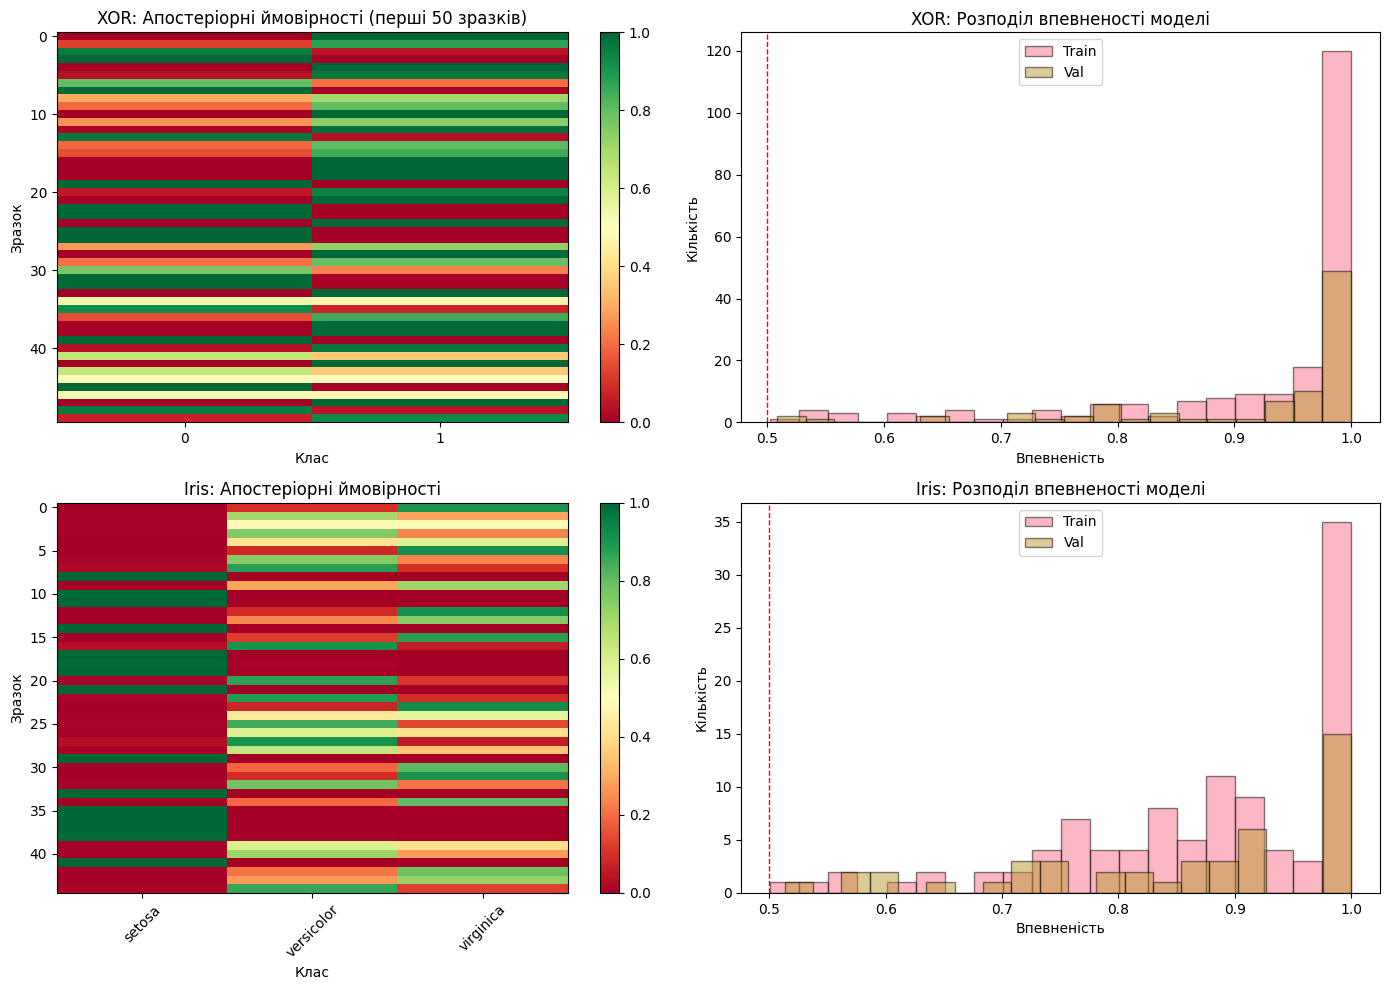

In [47]:
# XOR DATASET
print("1. XOR DATASET")
best_xor_model = results_xor['models'][best_idx_xor]
xor_proba_train = best_xor_model.predict_proba(X_xor_train)
xor_proba_val = best_xor_model.predict_proba(X_xor_val)

print(f"Модель з {best_neurons_xor} нейронів:")
print(f"  Приклади апостеріорних ймовірностей (валідаційна вибірка):")
print(f"  {'Зразок':<10} {'Істина':<10} {'Передб.':<10} {'P(0)':<12} {'P(1)':<12} {'Впевн.'}")
print("-" * 70)
for i in range(10):
    conf = max(xor_proba_val[i])
    pred = best_xor_model.predict(X_xor_val)[i]
    print(f"  {i:<10} {Y_xor_val[i]:<10} {pred:<10} "
          f"{xor_proba_val[i][0]:<12.4f} {xor_proba_val[i][1]:<12.4f} {conf:.4f}")

# Аналіз впевненості
xor_conf_train = np.max(xor_proba_train, axis=1)
xor_conf_val = np.max(xor_proba_val, axis=1)
print(f"\n  Середня впевненість (train): {xor_conf_train.mean():.4f}")
print(f"  Середня впевненість (val):   {xor_conf_val.mean():.4f}")
print(f"  Мінімальна впевненість (val): {xor_conf_val.min():.4f}")

# IRIS DATASET
print("\n2. IRIS DATASET")
best_iris_model = results_iris['models'][best_idx_iris]
iris_proba_train = best_iris_model.predict_proba(X_iris_train)
iris_proba_val = best_iris_model.predict_proba(X_iris_val)

print(f"Модель з {best_neurons_iris} нейронів:")
print(f"  Приклади апостеріорних ймовірностей (валідаційна вибірка):")
print(f"  {'Зр':<5} {'Істина':<12} {'Передб.':<12} {'P(setosa)':<12} {'P(versicolor)':<15} {'P(virginica)':<14} {'Впевн.'}")
print("-" * 85)
for i in range(10):
    conf = max(iris_proba_val[i])
    true_class = target_names[Y_iris_val[i]]
    pred_class = target_names[best_iris_model.predict(X_iris_val)[i]]
    print(f"  {i:<5} {true_class:<12} {pred_class:<12} "
          f"{iris_proba_val[i][0]:<12.4f} {iris_proba_val[i][1]:<15.4f} {iris_proba_val[i][2]:<14.4f} {conf:.4f}")

# Аналіз впевненості
iris_conf_train = np.max(iris_proba_train, axis=1)
iris_conf_val = np.max(iris_proba_val, axis=1)
print(f"\n  Середня впевненість (train): {iris_conf_train.mean():.4f}")
print(f"  Середня впевненість (val):   {iris_conf_val.mean():.4f}")
print(f"  Мінімальна впевненість (val): {iris_conf_val.min():.4f}")

# Візуалізація ймовірностей та впевненості
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# XOR - Heatmap ймовірностей
im1 = axes[0, 0].imshow(xor_proba_val[:50], aspect='auto', cmap='RdYlGn', vmin=0, vmax=1)
axes[0, 0].set_title(f'XOR: Апостеріорні ймовірності (перші 50 зразків)')
axes[0, 0].set_xlabel('Клас')
axes[0, 0].set_ylabel('Зразок')
axes[0, 0].set_xticks([0, 1])
plt.colorbar(im1, ax=axes[0, 0])

# XOR - Розподіл впевненості
axes[0, 1].hist(xor_conf_train, bins=20, alpha=0.5, label='Train', edgecolor='black')
axes[0, 1].hist(xor_conf_val, bins=20, alpha=0.5, label='Val', edgecolor='black')
axes[0, 1].set_title('XOR: Розподіл впевненості моделі')
axes[0, 1].set_xlabel('Впевненість')
axes[0, 1].set_ylabel('Кількість')
axes[0, 1].legend()
axes[0, 1].axvline(x=0.5, color='r', linestyle='--', linewidth=1)

# Iris - Heatmap ймовірностей
im2 = axes[1, 0].imshow(iris_proba_val, aspect='auto', cmap='RdYlGn', vmin=0, vmax=1)
axes[1, 0].set_title(f'Iris: Апостеріорні ймовірності')
axes[1, 0].set_xlabel('Клас')
axes[1, 0].set_ylabel('Зразок')
axes[1, 0].set_xticks([0, 1, 2])
axes[1, 0].set_xticklabels(['setosa', 'versicolor', 'virginica'], rotation=45)
plt.colorbar(im2, ax=axes[1, 0])

# Iris - Розподіл впевненості
axes[1, 1].hist(iris_conf_train, bins=20, alpha=0.5, label='Train', edgecolor='black')
axes[1, 1].hist(iris_conf_val, bins=20, alpha=0.5, label='Val', edgecolor='black')
axes[1, 1].set_title('Iris: Розподіл впевненості моделі')
axes[1, 1].set_xlabel('Впевненість')
axes[1, 1].set_ylabel('Кількість')
axes[1, 1].legend()
axes[1, 1].axvline(x=0.5, color='r', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

**Спостереження:**

Аналіз апостеріорних ймовірностей показав, що модель для XOR демонструє дуже високу впевненість у своїх прогнозах із середнім значенням 92.4% на навчальній вибірці та 92.3% на валідаційній. Більшість ймовірностей близькі до 0 або 1, що свідчить про чітке розділення класів моделлю.
Для Iris спостерігається дещо нижча впевненість моделі, а саме 87.7% на навчальній та 85.1% на валідаційній. З heatmap апостеріорних ймовірностей видно, що модель практично ідеально розпізнає клас setosa, але часто має труднощі з розрізненням versicolor та virginica, де ймовірності можуть бути близькими до 0.5. Це можна пояснити природним перекриттям цих класів у просторі ознак.

**Висновок:**

Розподіл впевненості для обох датасетів показує схожі результати на обох вибірках, що вказує на відсутність перенавчання.

## Крок 8: Візуалізація меж прийняття рішень

In [48]:
def plot_decision_boundary(model, X, Y, ax, title, class_names=None):
    # Крок сітки
    h = 0.02

    # Створення сітки точок
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Передбачення класу для кожної точки сітки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Межі
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)

    # Точки даних
    colors = ['red', 'green', 'blue']
    for i in range(len(np.unique(Y))):
        mask = Y == i
        label = class_names[i] if class_names is not None else f'Class {i}'
        ax.scatter(X[mask, 0], X[mask, 1], c=colors[i],
                  label=label, edgecolors='black', s=50, alpha=0.8)

    ax.set_title(title, fontsize=13)
    ax.legend()
    ax.grid(True, alpha=0.2)

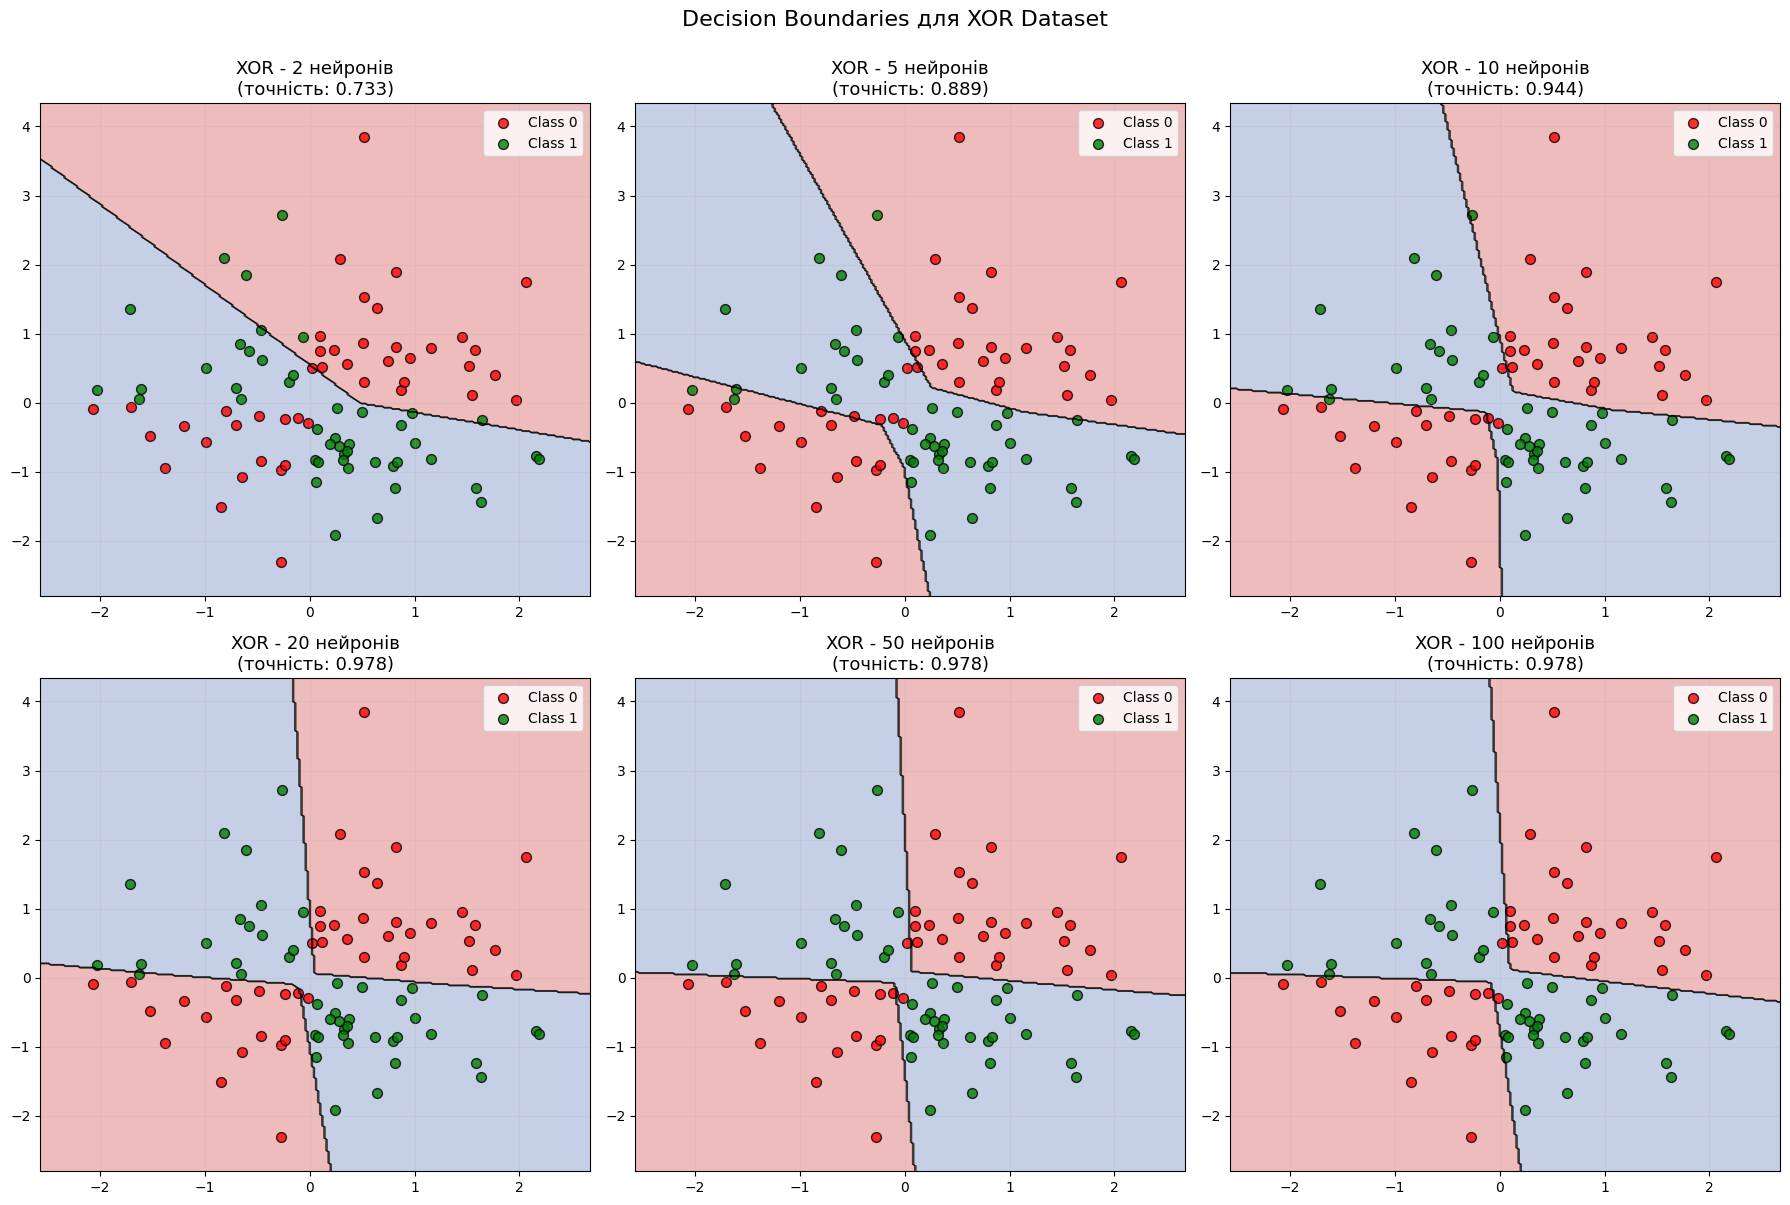

In [49]:
# Візуалізація для XOR Dataset
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# XOR - різні конфігурації одношарових моделей
for idx, n_neurons in enumerate([2, 5, 10]):
    model_idx = neuron_counts.index(n_neurons)
    model = results_xor['models'][model_idx]
    val_acc = results_xor['val_acc'][model_idx]

    plot_decision_boundary(
        model, X_xor_val, Y_xor_val, axes[0, idx],
        f'XOR - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=['Class 0', 'Class 1']
    )

# XOR - більш складні моделі
for idx, n_neurons in enumerate([20, 50, 100]):
    model_idx = neuron_counts.index(n_neurons)
    model = results_xor['models'][model_idx]
    val_acc = results_xor['val_acc'][model_idx]

    plot_decision_boundary(
        model, X_xor_val, Y_xor_val, axes[1, idx],
        f'XOR - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=['Class 0', 'Class 1']
    )

plt.suptitle('Decision Boundaries для XOR Dataset', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

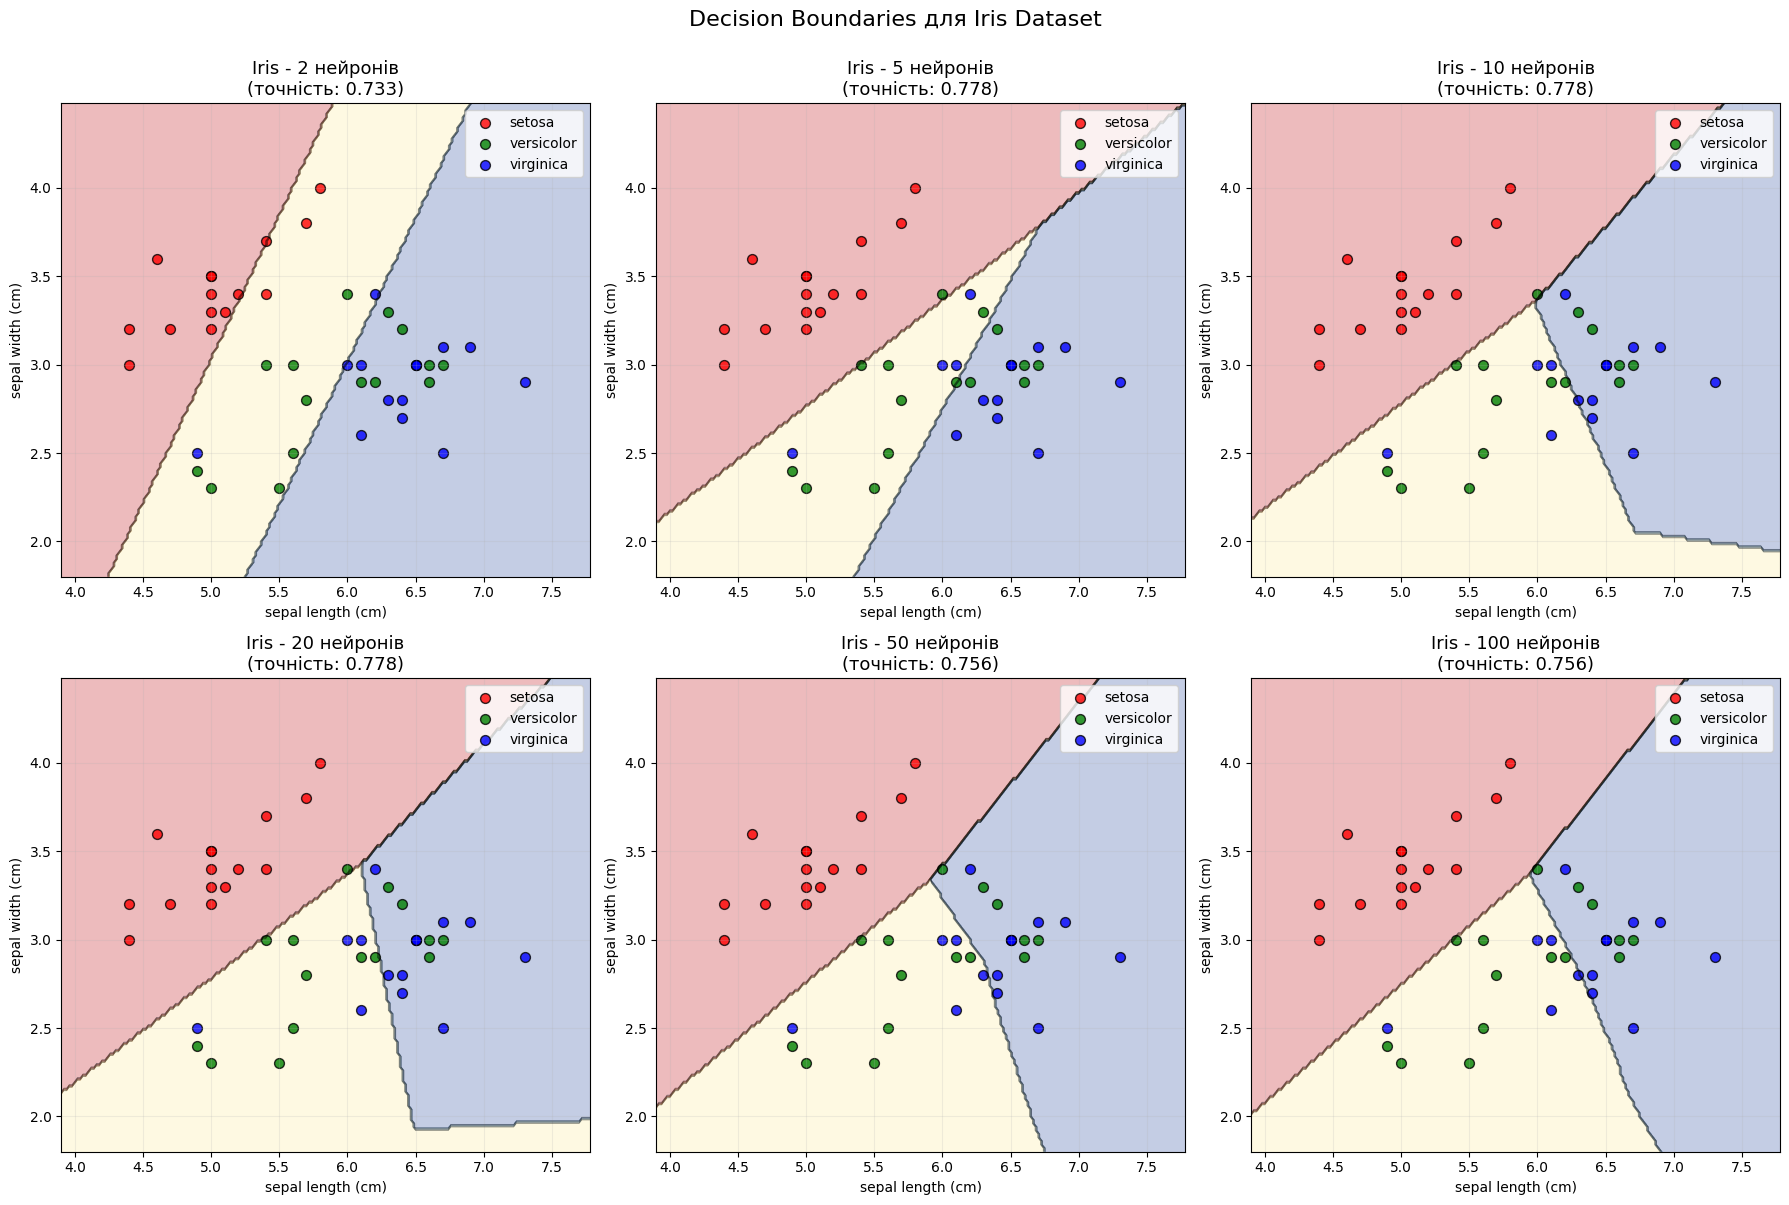

In [50]:
# Візуалізація для Iris Dataset (використовуємо перші 2 ознаки)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

X_iris_2d = X_iris[:, :2]
X_iris_train_2d, X_iris_val_2d, _, _ = train_test_split(
    X_iris_2d, Y_iris, test_size=0.3, random_state=42, stratify=Y_iris
)

# Навчання моделі на 2D даних
iris_models_2d = []
for n_neurons in [2, 5, 10, 20, 50, 100]:
    model = MLPClassifier(
        hidden_layer_sizes=(n_neurons,),
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    model.fit(X_iris_train_2d, Y_iris_train)
    iris_models_2d.append(model)

# Візуалізація
for idx, n_neurons in enumerate([2, 5, 10]):
    model = iris_models_2d[idx]
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val_2d))

    plot_decision_boundary(
        model, X_iris_val_2d, Y_iris_val, axes[0, idx],
        f'Iris - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=target_names
    )
    axes[0, idx].set_xlabel(feature_names[0])
    axes[0, idx].set_ylabel(feature_names[1])

for idx, n_neurons in enumerate([20, 50, 100]):
    model = iris_models_2d[idx + 3]
    val_acc = accuracy_score(Y_iris_val, model.predict(X_iris_val_2d))

    plot_decision_boundary(
        model, X_iris_val_2d, Y_iris_val, axes[1, idx],
        f'Iris - {n_neurons} нейронів\n(точність: {val_acc:.3f})',
        class_names=target_names
    )
    axes[1, idx].set_xlabel(feature_names[0])
    axes[1, idx].set_ylabel(feature_names[1])

plt.suptitle('Decision Boundaries для Iris Dataset', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

**Спостреження:**

Для XOR модель з 2 нейронами показує лінійну границю і точність лише 73.3%, що є недостатнім для нелінійної XOR задачі. Починаючи з 5 нейронів, модель формує нелінійну границю у вигляді кривої, а при 10 нейронах досягає точності 94.4% з чіткою діагональною границею. Моделі з 20, 50 та 100 нейронами демонструють майже ідентичні границі з точністю 97.8%, що вказує на те, що вже 20 нейронів достатньо для якісного розв'язання XOR задачі.
Для Iris границі рішень є лінійними завдяки природній лінійній розділеності класів у просторі перших двох ознак. Модель з 2 нейронами досягає 73.3% точності, а вже з 5 нейронами точність зростає до 77.8% і залишається стабільною для більших моделей.

**Висновок:**

Отже, XOR потребує нелінійних границь і відчутно виграє від збільшення нейронів до 10-20, тоді як для Iris достатньо простішої моделі з 5 нейронами, оскільки задача є майже лінійно розділеною у просторі базових ознак.

## Крок 9: Розрахунок метрик якості класифікації

1. XOR DATASET
Метрики:
Precision (Train): 0.9292
Precision (Val):   0.9787
Recall (Train):    0.9906
Recall (Val):      1.0000
F1 Score (Train):  0.9589
F1 Score (Val):    0.9892

2. IRIS DATASET
Метрики:
Precision (Train): 0.9737
Precision (Val):   1.0000
Recall (Train):    0.9714
Recall (Val):      1.0000
F1 Score (Train):  0.9714
F1 Score (Val):    1.0000


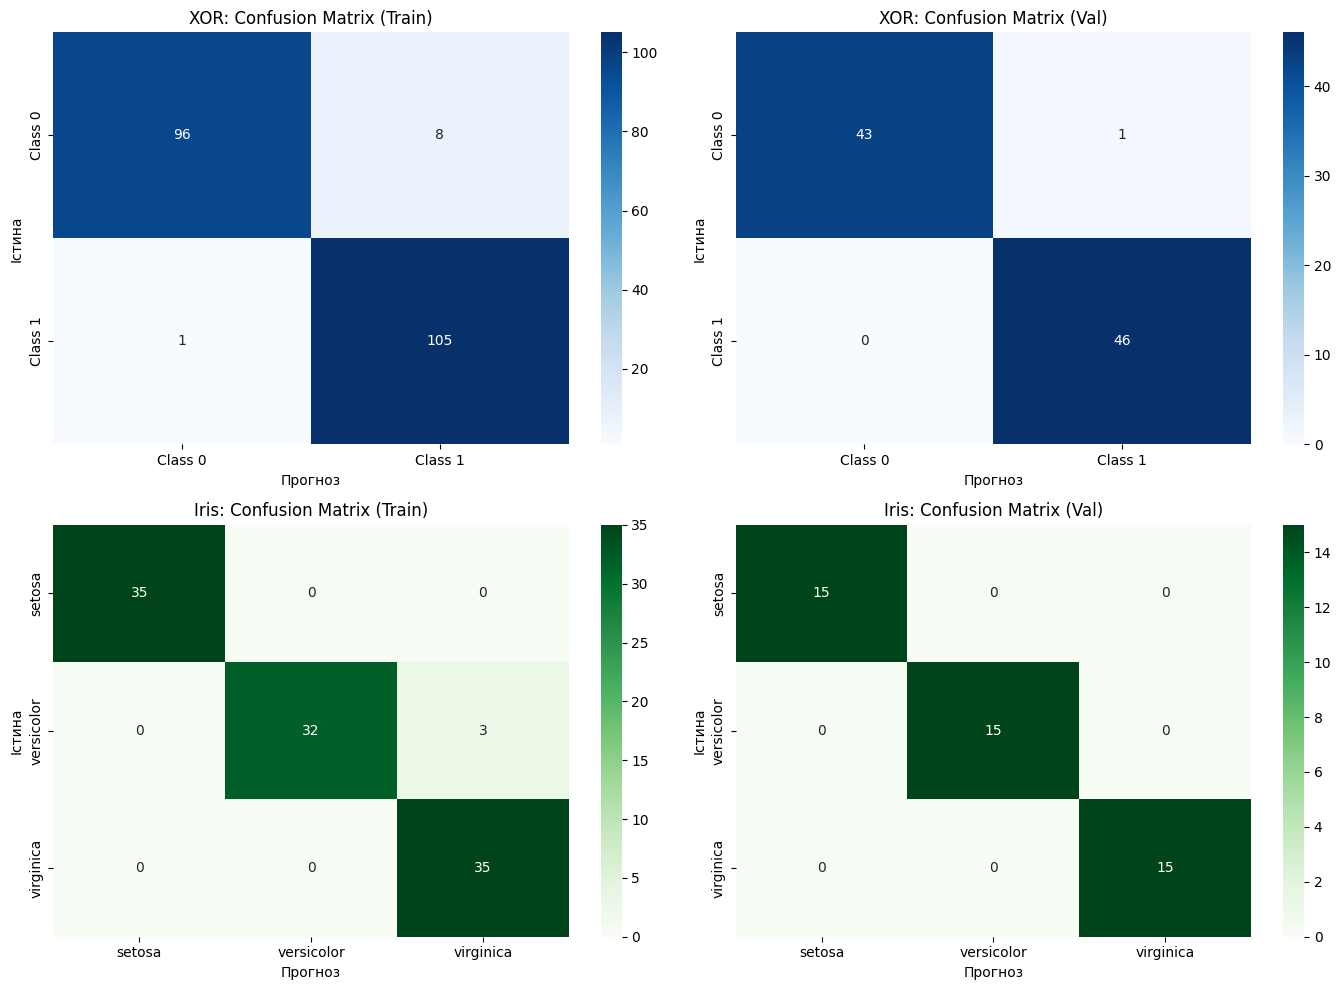

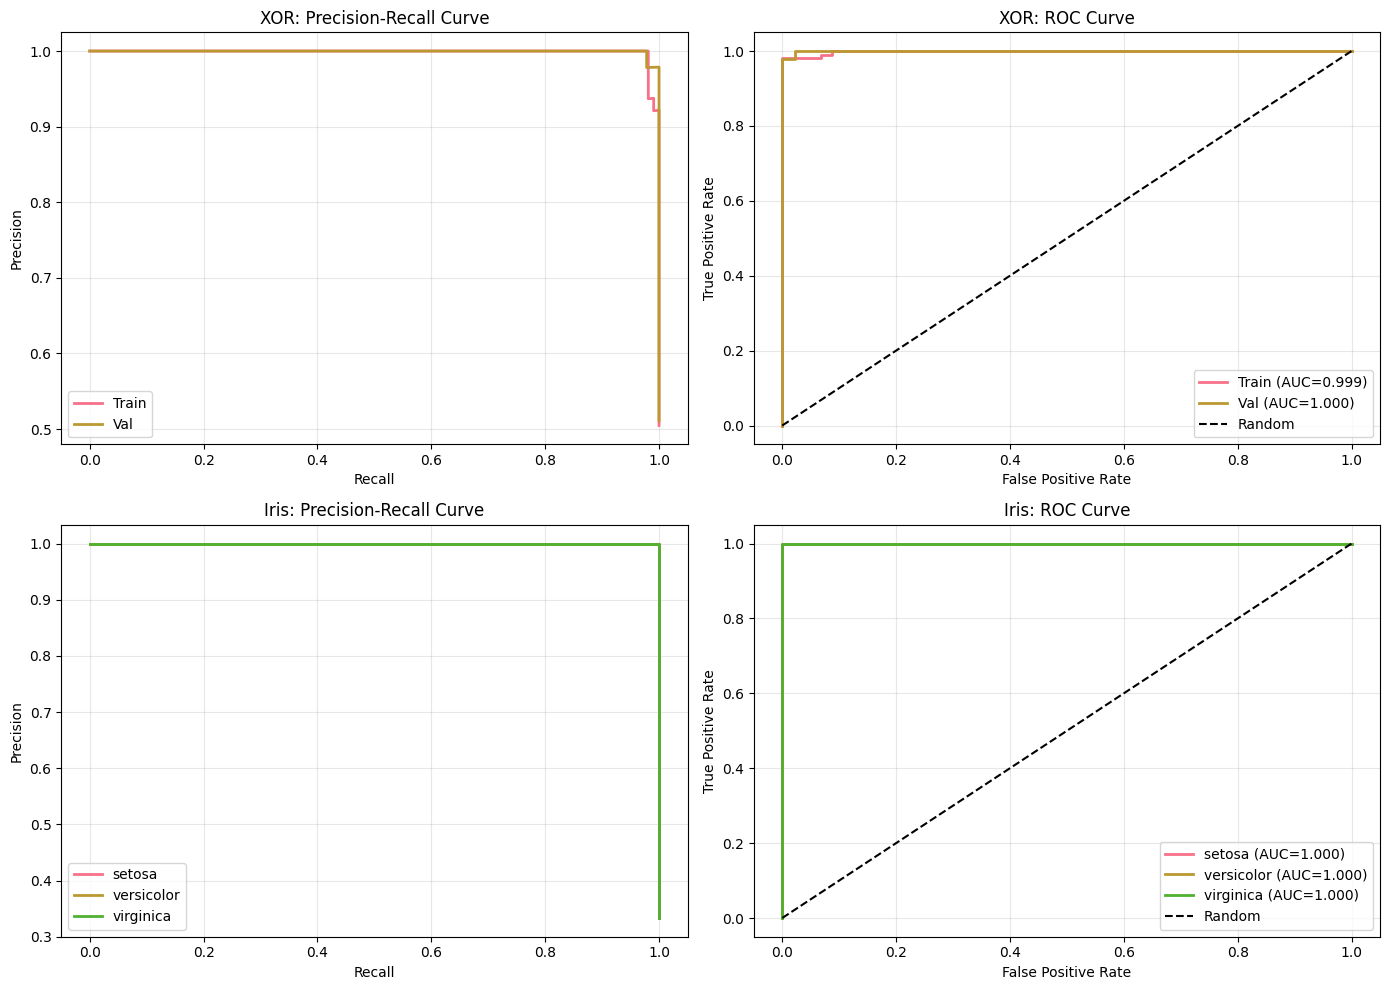

In [51]:
# XOR DATASET
print("1. XOR DATASET")
print("Метрики:")
print(f"Precision (Train): {precision_score(Y_xor_train, xor_pred_train):.4f}")
print(f"Precision (Val):   {precision_score(Y_xor_val, xor_pred_val):.4f}")
print(f"Recall (Train):    {recall_score(Y_xor_train, xor_pred_train):.4f}")
print(f"Recall (Val):      {recall_score(Y_xor_val, xor_pred_val):.4f}")
print(f"F1 Score (Train):  {f1_score(Y_xor_train, xor_pred_train):.4f}")
print(f"F1 Score (Val):    {f1_score(Y_xor_val, xor_pred_val):.4f}")

# IRIS DATASET
print("\n2. IRIS DATASET")
print("Метрики:")
print(f"Precision (Train): {precision_score(Y_iris_train, iris_pred_train, average='macro'):.4f}")
print(f"Precision (Val):   {precision_score(Y_iris_val, iris_pred_val, average='macro'):.4f}")
print(f"Recall (Train):    {recall_score(Y_iris_train, iris_pred_train, average='macro'):.4f}")
print(f"Recall (Val):      {recall_score(Y_iris_val, iris_pred_val, average='macro'):.4f}")
print(f"F1 Score (Train):  {f1_score(Y_iris_train, iris_pred_train, average='macro'):.4f}")
print(f"F1 Score (Val):    {f1_score(Y_iris_val, iris_pred_val, average='macro'):.4f}")

# Візуалізація матриць неточностей
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

cm_xor_train = confusion_matrix(Y_xor_train, xor_pred_train)
cm_xor_val = confusion_matrix(Y_xor_val, xor_pred_val)

# XOR - Train
sns.heatmap(cm_xor_train, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axes[0, 0].set_title('XOR: Confusion Matrix (Train)')
axes[0, 0].set_ylabel('Істина')
axes[0, 0].set_xlabel('Прогноз')

# XOR - Val
sns.heatmap(cm_xor_val, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
axes[0, 1].set_title('XOR: Confusion Matrix (Val)')
axes[0, 1].set_ylabel('Істина')
axes[0, 1].set_xlabel('Прогноз')


cm_iris_train = confusion_matrix(Y_iris_train, iris_pred_train)
cm_iris_val = confusion_matrix(Y_iris_val, iris_pred_val)

# Iris - Train
sns.heatmap(cm_iris_train, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0],
            xticklabels=target_names, yticklabels=target_names)
axes[1, 0].set_title('Iris: Confusion Matrix (Train)')
axes[1, 0].set_ylabel('Істина')
axes[1, 0].set_xlabel('Прогноз')

# Iris - Val
sns.heatmap(cm_iris_val, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1],
            xticklabels=target_names, yticklabels=target_names)
axes[1, 1].set_title('Iris: Confusion Matrix (Val)')
axes[1, 1].set_ylabel('Істина')
axes[1, 1].set_xlabel('Прогноз')

plt.tight_layout()
plt.show()

# Побудова PR та ROC кривих
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# XOR - PR Curve
precision_train, recall_train, _ = precision_recall_curve(Y_xor_train, xor_proba_train[:, 1])
precision_val, recall_val, _ = precision_recall_curve(Y_xor_val, xor_proba_val[:, 1])
axes[0, 0].plot(recall_train, precision_train, label='Train', linewidth=2)
axes[0, 0].plot(recall_val, precision_val, label='Val', linewidth=2)
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('XOR: Precision-Recall Curve')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# XOR - ROC Curve
fpr_train, tpr_train, _ = roc_curve(Y_xor_train, xor_proba_train[:, 1])
fpr_val, tpr_val, _ = roc_curve(Y_xor_val, xor_proba_val[:, 1])
auc_train = auc(fpr_train, tpr_train)
auc_val = auc(fpr_val, tpr_val)
axes[0, 1].plot(fpr_train, tpr_train, label=f'Train (AUC={auc_train:.3f})', linewidth=2)
axes[0, 1].plot(fpr_val, tpr_val, label=f'Val (AUC={auc_val:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('XOR: ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Iris - PR Curve
Y_iris_val_bin = label_binarize(Y_iris_val, classes=[0, 1, 2])
for i, name in enumerate(target_names):
    precision, recall, _ = precision_recall_curve(Y_iris_val_bin[:, i], iris_proba_val[:, i])
    axes[1, 0].plot(recall, precision, label=name, linewidth=2)
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Iris: Precision-Recall Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Iris - ROC Curve
for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(Y_iris_val_bin[:, i], iris_proba_val[:, i])
    auc_score = auc(fpr, tpr)
    axes[1, 1].plot(fpr, tpr, label=f'{name} (AUC={auc_score:.3f})', linewidth=2)
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('Iris: ROC Curve')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Спостереження:**

Для XOR матриці неточностей показують високу якість класифікації, бо на тренувальній помилки мінімальні, а на валідаційній модель робить лише 1 помилку. Метрики підтверджують відмінну роботу моделі з precision 97.87%, recall 100% та F1 score 98.92% на валідації. ROC-крива показує практично ідеальну класифікацію з AUC=1.000 на валідації та AUC=0.999 на тренувальній, що свідчить про відсутність перенавчання.
Для Iris на валідаційній модель досягає ідеальної класифікації з усіма метриками рівними 100%. Матриця неточностей на валідаційній показує, що всі 15 зразків кожного класу класифіковані правильно без жодної помилки. На тренувальній є 3 помилки, що дає precision, recall та F1 близько 97%. ROC-криві для всіх трьох класів мають AUC=1.000, демонструючи ідеальне розділення класів.

**Висновок:**

Обидві моделі показують відмінну якість класифікації.

## Крок 10: Розрахунок коефiцiєнта детермiнацiї R<sup>2</sup>, помилки RMSE, MAE та MAPE.
Оскільки за умовою в нас задача класифікації, пропускаємо завдання.

## Крок 11: Решітчастий пошук (Grid Search) для підбору гіперпараметрів.
## Крок 13: Навчання моделей на підмножинах навчальних даних.

GRID SEARCH + LEARNING CURVE ДЛЯ ОБОХ ДАТАСЕТІВ
Найкращі параметри: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant'}
Точність (cross-val): 0.9857
Точність (validation): 0.9333
Train size  20% → accuracy(val): 0.9333
Train size  50% → accuracy(val): 0.9556
Train size  80% → accuracy(val): 0.9889
Train size 100% → accuracy(val): 0.9889
Найкращі параметри: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant'}
Точність (cross-val): 0.9810
Точність (validation): 1.0000
Train size  20% → accuracy(val): 1.0000
Train size  50% → accuracy(val): 1.0000
Train size  80% → accuracy(val): 1.0000
Train size 100% → accuracy(val): 1.0000


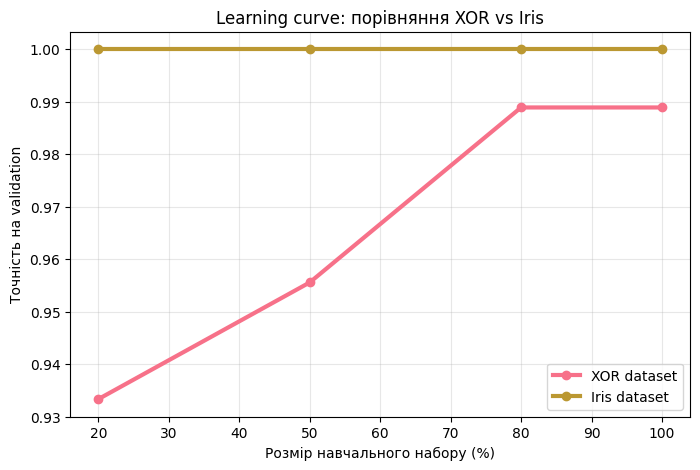

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(2,), (5,), (10,), (20,), (50,), (100,), (5, 5), (10, 10)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"]
}

datasets = {
    "XOR": (X_xor_train, Y_xor_train, X_xor_val, Y_xor_val, best_neurons_xor),
    "Iris": (X_iris_train, Y_iris_train, X_iris_val, Y_iris_val, best_neurons_iris)
}

results = {}

print("GRID SEARCH + LEARNING CURVE ДЛЯ ОБОХ ДАТАСЕТІВ")

for name, (Xtr, Ytr, Xval, Yval, best_neurons) in datasets.items():


    grid = GridSearchCV(
        MLPClassifier(max_iter=3000, random_state=42),
        param_grid,
        cv=3,
        scoring="accuracy",
        n_jobs=-1
    )

    grid.fit(Xtr, Ytr)

    best_model = grid.best_estimator_
    val_acc = accuracy_score(Yval, best_model.predict(Xval))

    print(f"Найкращі параметри: {grid.best_params_}")
    print(f"Точність (cross-val): {grid.best_score_:.4f}")
    print(f"Точність (validation): {val_acc:.4f}")

    sizes = [0.2, 0.5, 0.8, 1.0]
    lc_acc = []

    for s in sizes:
        n = int(len(Xtr) * s)

        model = MLPClassifier(hidden_layer_sizes=(best_neurons,),
                              activation='relu', max_iter=3000, random_state=42)

        model.fit(Xtr[:n], Ytr[:n])
        score = accuracy_score(Yval, model.predict(Xval))
        lc_acc.append(score)
        print(f"Train size {int(s * 100):>3}% → accuracy(val): {score:.4f}")

    results[name] = lc_acc

plt.figure(figsize=(8, 5))
plt.plot([20, 50, 80, 100], results["XOR"], marker='o', linewidth=3, label="XOR dataset")
plt.plot([20, 50, 80, 100], results["Iris"], marker='o', linewidth=3, label="Iris dataset")
plt.xlabel("Розмір навчального набору (%)")
plt.ylabel("Точність на validation")
plt.title("Learning curve: порівняння XOR vs Iris")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


У процесі роботи стало очевидно, що однакова модель по-різному поводиться на різних типах даних. Для штучного XOR датасету — де класи не лінійно розділяються — простий персептрон з малим числом нейронів виявився недостатнім. Лише після збільшення кількості нейронів стало можливим сформувати нелінійну межу рішень та досягнути високої точності. Тобто, складність моделі має відповідати складності даних.

На реальному наборі даних Iris ситуація виявилася протилежною. Дані легко піддаються класифікації, тому навіть невелика нейронна мережа з одним прихованим шаром і малою кількістю нейронів забезпечила відмінну точність. Підбір гіперпараметрів (GridSearchCV) лише підтвердив, що проста модель є оптимальною. Цікаво, що мережа показувала максимальну точність навіть тоді, коли навчалась лише на частині даних. Це свідчить про те, що дані добре структуровані, а модель не перенавчається.